## Роботу виконав Трибушенко Артем, студент ІВ-93, варіант = 327 

In [286]:
import numpy as np
import random as rn
import pandas as pd
from IPython.display import Image

# Завдання до лабораторної роботи

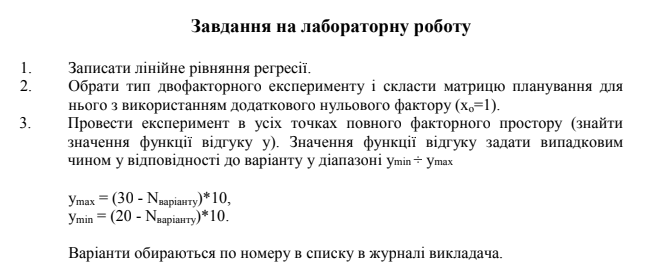

In [290]:
Image("task1.png")

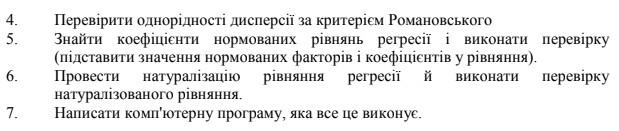

In [288]:
Image("task2.png")

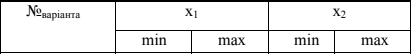

In [291]:
Image("variant1.png")

In [292]:
Image("variant2.png")

# Початок коду

In [ ]:
N = 327 #  варіант
m = 6 # кількість експериментів
y_max = (30 - N) * 10
y_min = (20 - N) * 10

x1_min, x1_max = [10, 60]
x2_min, x2_max = [-35, 10]

xn = [[-1, -1], [-1, 1], [1, -1]] # нормалізовані фактори

matrix = pd.DataFrame({"x1" : [i[0] for i in xn], "x2" : [i[1] for i in xn]})

### Формування значень у1, у2, у3 випадковим чином і додання їх у датафрейм

In [210]:
y = np.array([[random.randint(y_min, y_max) for i in range(m)] for j in range(3)])

for i in range(len(y[0])):
    y_n = "y" + str(i + 1)
    matrix[y_n] = np.array([j[i] for j in y])

matrix

,x1,x2,y1,y2,y3,y4,y5,y6
0,-1,-1,-3029,-3061,-2991,-2983,-2995,-3015
1,-1,1,-3064,-2988,-2975,-3016,-3014,-3047
2,1,-1,-3059,-3003,-3012,-3010,-2986,-3047


## Середнє значення y1, y2, y3 

In [211]:
y_avg = [i.mean() for i in y]

for i in range(len(y_avg)):
    y_n = "y" + str(i + 1)
    print(y_n + "-average = " +str(y_avg[i]))

y1-average = -3012.3333333333335
y2-average = -3017.3333333333335
y3-average = -3019.5


## Дисперсія y1, y2, y3

In [212]:
disp_y = [i.var() for i in y]

for i in range(len(y_avg)):
    y_n = "y" + str(i + 1)
    print(y_n + "-dispersion = " +str(disp_y[i]))

y1-dispersion = 711.5555555555557
y2-dispersion = 953.888888888889
y3-dispersion = 642.9166666666666


## Основне відхилення

In [213]:
sigma_theta = np.sqrt((2 * (2 * m - 2))/(m * (m - 4)))
sigma_theta

1.2909944487358056

## Обчислимо F_uv

In [214]:
def f_uv(u, v):
    if u >= v:
        return u / v
    else:
        return v / u

F_uv1 = f_uv(disp_y[0], disp_y[1])
F_uv2 = f_uv(disp_y[2], disp_y[0])
F_uv3 = f_uv(disp_y[2], disp_y[1])
fuv = [F_uv1, F_uv2, F_uv3]

print(f"F_uv1 = {round(F_uv1, 3)};\nF_uv2 = {round(F_uv2, 3)};\nF_uv3 = {round(F_uv3, 3)};")

F_uv1 = 1.341;
F_uv2 = 1.107;
F_uv3 = 1.484;


## Обчислимо Theta_uv

In [237]:
num = (m - 2) / m
theta_uv1 = num * F_uv1
theta_uv2 = num * F_uv2
theta_uv3 = num * F_uv3

theta = [theta_uv1, theta_uv2, theta_uv3]
print(f"theta_uv1 = {round(theta_uv1, 3)};\ntheta_uv2 = {round(theta_uv2, 3)};\ntheta_uv3 = {round(theta_uv3, 3)};")

[0.8082686282522817, 0.7573069559668154, 0.7115288561957953]
theta_uv1 = 0.894;
theta_uv2 = 0.738;
theta_uv3 = 0.989;


## Обчислимо R_uv

In [238]:
r_uv1 = np.abs(theta_uv1 - 1) / sigma_theta
r_uv2 = np.abs(theta_uv2 - 1) / sigma_theta
r_uv3 = np.abs(theta_uv3 - 1) / sigma_theta

ruv = [r_uv1, r_uv2, r_uv3]
print(f"r_uv1 = {round(r_uv1, 3)};\nr_uv2 = {round(r_uv2, 3)};\nr_uv3 = {round(r_uv3, 3)};")

[0.1485144819448832, 0.18798922355618145, 0.22344878716301794]
r_uv1 = 0.082;
r_uv2 = 0.203;
r_uv3 = 0.008;


### Візьмемо значення r_kr = 2 для m=6 і довірчою ймовірністю р=0.9

In [253]:
r_kr = 2

homogeneous = True
for i in range(len(ruv)):
    if ruv[i] > r_kr:
        print("Неоднорідна дисперсія")
        homogeneous = False
if homogeneous:
    print("Однорідна дисперсія")

Однорідна дисперсія


## Розрахунок нормованих коефіцієнтів рівняння регресії.

In [250]:
mx = [sum([xn[i][j] for i in range(len(xn))]) / len(xn) for j in range(len(xn[0]))]
m_y = sum(y_avg) / len(y_avg)
a1 = sum(xn[i][0] ** 2 for i in range(len(xn))) / len(xn)
a2 = (xn[0][0] * xn[0][1] + xn[1][0] * xn[1][1] + xn[2][0] * xn[2][1]) / len(xn)
a3 = sum(xn[i][1] ** 2 for i in range(len(xn))) / len(xn)
a11 = sum(xn[i][0] * y_avg[i] for i in range(len(xn))) / len(xn)
a22 = sum(xn[i][1] * y_avg[i] for i in range(len(xn))) / len(xn)
print(f"Нормовані коефіцієнти рівняння регресії:\nmx1 = {mx1};\nmx2 = {mx2};\nm_y_avg = {m_y};\na1 = {a1};\n" + 
      f"a2 = {a2}\na3 = {a3}\na11 = {a11};\na22 = {a22};")

Нормовані коефіцієнти рівняння регресії:
mx1 = -0.3333333333333333;
mx2 = -0.3333333333333333;
m_y_avg = -3016.388888888889;
a1 = 1.0;
a2 = -0.3333333333333333
a3 = 1.0
a11 = 1003.388888888889;
a22 = 1004.8333333333334;


## Коефіцієнти регресії

In [266]:
b0 = np.linalg.det(np.array([[m_y, mx1, mx2], [a11, a1, a2], [a22, a2, a3]])) / np.linalg.det(np.array([[1, mx1, mx2], [mx1, a1, a2], [mx2, a2, a3]]))
b1 = np.linalg.det(np.array([[1, m_y, mx2], [mx1, a11, a2], [mx2, a22, a3]])) / np.linalg.det(np.array([[1, mx1, mx2], [mx1, a1, a2], [mx2, a2, a3]]))
b2 = np.linalg.det(np.array([[1, mx1, m_y], [mx1, a1, a11], [mx2, a2, a22]])) / np.linalg.det(np.array([[1, mx1, mx2], [mx1, a1, a2], [mx2, a2, a3]]))

In [ ]:
def determinant(x11, x12, x13, x21, x22, x23, x31, x32, x33):
    det = x11 * x22 * x33 + x12 * x23 * x31 + x32 * x21 * x13 - x13 * x22 * x31 - x32 * x23 * x11 - x12 * x21 * x33
    return det
b0 = determinant(my, mx1, mx2, a11, a1, a2, a22, a2, a3) / np.linalg.det([[1, mx1, mx2], [mx1, a1, a2], [mx2, a2, a3]])
b1 = determinant(1, my, mx2, mx1, a11, a2, mx2, a22, a3) / determinant(1, mx1, mx2, mx1, a1, a2, mx2, a2, a3)
b2 = determinant(1, mx1, my, mx1, a1, a11, mx2, a2, a22) / determinant(1, mx1, mx2, mx1, a1, a2, mx2, a2, a3)

## Нормоване рівняння регресії виглядить наступним чином:

In [267]:
print(f"Рівняння регресії:\ny = {round(b0, 3)} + {round(b1, 3)}*x1 + {round(b2, 3)}*x2")

Рівняння регресії:
y = -3018.417 + -3.583*x1 + -2.5*x2


## Перевіримо правильність рівняння

In [276]:
print(f"{round(b0, 3)} + {round(b1, 3)}*({xn[0][0]}) + {round(b2, 3)}*({xn[0][1]}) = -3012.334\ny-середнє = {y_avg[0]}\nДані сходяться, отже коефіцієнти підібрані правильно!")

-3018.417 + -3.583*(-1) + -2.5*(-1) = -3012.334
y-середнє = -3012.3333333333335
Дані сходяться, отже коефіцієнти підібрані правильно!


## Проведемо натуралізацію коефіцієнтів:

In [282]:
delta_x1 = np.abs(x1_max - x1_min) / 2 
delta_x2 = np.abs(x2_max - x2_min) / 2
x10 = (x1_max + x1_min)
x20 = (x2_max + x2_min)
a0 = b0 - b1 * (x10 / delta_x1) - b2 * (x20 / delta_x2)
a1 = b1 / delta_x1
a2 = b2 / delta_x2
print(f"Натуралізоване рівняння регресії:\ny = {round(a0, 3)} + {round(a1, 3)}*x1 + {round(a2, 3)}*x2")

Натуралізоване рівняння регресії:
y = -3011.161 + -0.143*x1 + -0.111*x2


## Перевіримо правильність натуралізованого рівняння

In [284]:
print(f"{round(a0, 3)} + {round(a1, 3)}*({xn[0][0]}) + {round(a2, 3)}*({xn[0][1]}) = {round(a0 + a1*xn[0][0]+a2*xn[0][1], 3)}\ny-середнє = {y_avg[0]}\nДані майже сходяться, отже коефіцієнти підібрані правильно!")

-3011.161 + -0.143*(-1) + -0.111*(-1) = -3010.907
y-середнє = -3012.3333333333335
Дані майже сходяться, отже коефіцієнти підібрані правильно!
